<h1 style="color:#8B1874;">Seyed Mahdi Haji Seyed Hossein</h1>

<h1 style="color:#B71375;">CA #3 Naive Bayes Classifier</h1>

<h2 style="color:#B71375;">Purpose of Project : classifier model to predict persian number handwriten </h2>

<h3 style="color:#FC4F00;">First we should train a model based on handwriten persian numbers and then test another datas to test our model with three model and then Performance measurement</h3>

<h4 style="color:#F79540;">This data loaded to train our model to predict the handwriten persian numbers but we use only most of them NOT ALL OF THEM to train and then other datas will use to test our model</h4>

<h4 style="color:#F79540;">This library is for read the PKL format file </h4>

In [343]:
import pickle

In [344]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import cv2


<h2 style="color:#B71375;">Part 1 :</h2>

<h3 style="color:#FC4F00;">Question 1 :</h3>

<h4 style="color:#F79540;">The ratio of training data to test data depends on various factors, such as the size of the dataset, the complexity of the problem, the amount of noise in the data, and the algorithm used for training the model.</h4> 

<h4 style="color:#F79540;">However, a commonly used ratio is 70:30 or 80:20, where 70% or 80% of the data is used for training and the rest is used for testing.</h4>

In [345]:
def load():
    dataFile = open('./Datasets/data.pkl', 'rb')
    data = pickle.load(dataFile)


    labelFile = open('./Datasets/label.pkl' , 'rb')
    label = pickle.load(labelFile)

    print("Number of all data :" , len(data))

    RatioTestPerTrain = 2/10

    print("test PER train ratio : " , RatioTestPerTrain)

    test = data[int(len(data) - len(data) * (RatioTestPerTrain)) :]

    testLabel = label[int(len(data) - len(data) * (RatioTestPerTrain)) :]
    train = data[ : int(len(data) - len(data) * (RatioTestPerTrain)) ]
    trainLabel = label[ : int(len(data) - len(data) * (RatioTestPerTrain)) ]


    print ("Number of test Data : " , len(test) )
    print ("number Of train Data : " , len(train))
    
    return train , trainLabel , test , testLabel , data , label

In [346]:
train , trainLabel , test , testLabel , data , label = load()

Number of all data : 6000
test PER train ratio :  0.2
Number of test Data :  1200
number Of train Data :  4800


<h3 style="color:#FC4F00;">Question 2 :</h3>

In [347]:
randomIndex = randint(1 , len(data))
chosen = data[randomIndex]
chosenLabel = label[randomIndex]

In [348]:
print(chosenLabel)

4


In [349]:
def plotTheData (chosen):
    pixelPlot = plt.figure()

    plt.title("Pixel Distribution for a random image ")
    pixelPlot = plt.imshow(chosen, cmap='Reds', interpolation='nearest')


    plt.colorbar(pixelPlot)

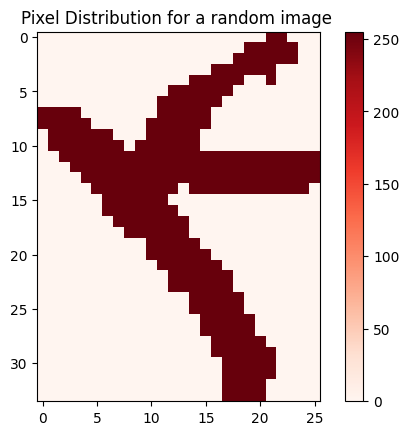

In [350]:
plotTheData(chosen)

<h3 style="color:#FC4F00;">Question 3 :</h3>

<h4 style="color:#F79540;">If the input sizes are different, then the model would have to be retrained every time the input size changes. This would be computationally expensive and time-consuming. By resizing all images to the same size, we can ensure that the model can process all inputs in a consistent and efficient manner.
<br><br>
Additionally, resizing images to the same size can help to reduce noise and variability in the input data, which can improve the accuracy of the model.</h4>

In [351]:
data[0].shape

(27, 20)

In [352]:
x = data[0]

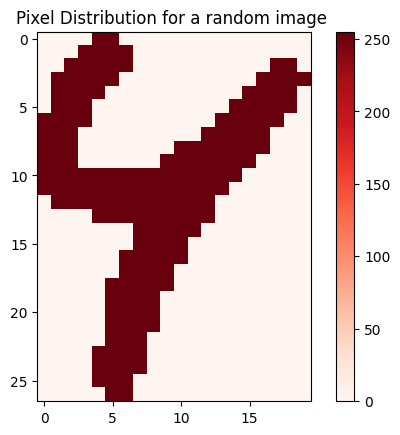

In [353]:
plotTheData(x)

In [354]:
desiredWidth = 20
desiredHeight = 20

newX = cv2.resize(x , (20 , 20) )

In [355]:
newX.shape

(20, 20)

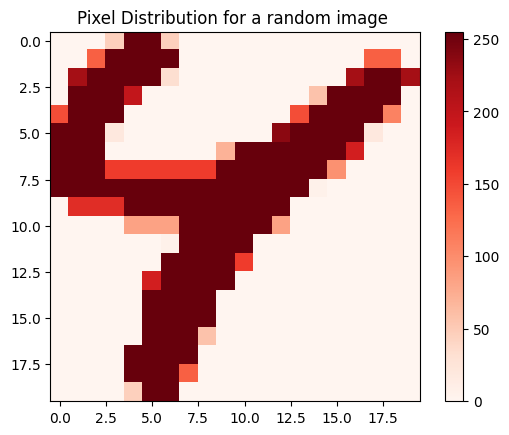

In [356]:
plotTheData(newX)

In [357]:
def resize ():
    for index in range(len(train)):
        train[index] = cv2.resize(train[index] , (desiredWidth , desiredHeight))

    for index in range(len(test)):
        test[index] = cv2.resize(test[index] , (desiredWidth , desiredHeight))

In [358]:
resize()

<h3 style="color:#FC4F00;">Question 4 :</h3>

In [359]:
def showAllNumberSample(train):
    sample = []
    
    for i in range( 0 , 10):
        for j in range (len(train)):
            if trainLabel[j] == i :
                sample.append((train[j] , i))
                break
    count = 0 
    for img in sample:
        print (img[1])
        plotTheData(img[0])
        

0
1
2
3
4
5
6
7
8
9


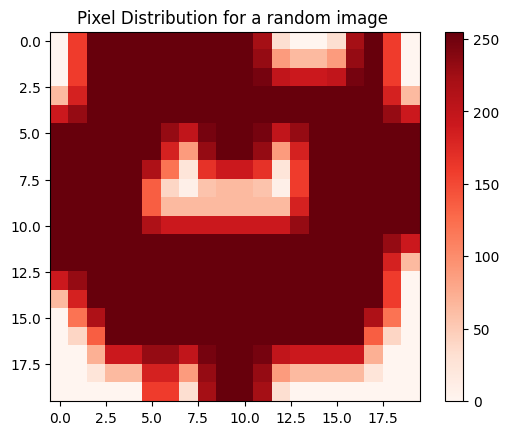

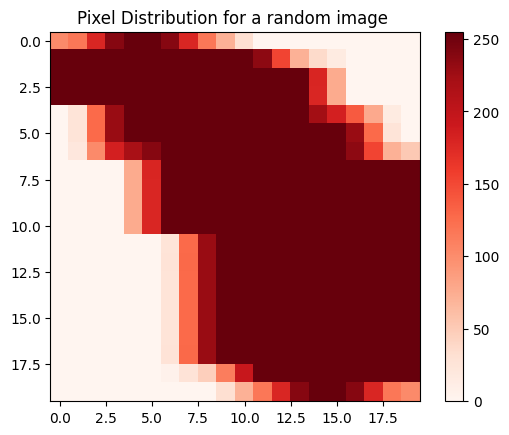

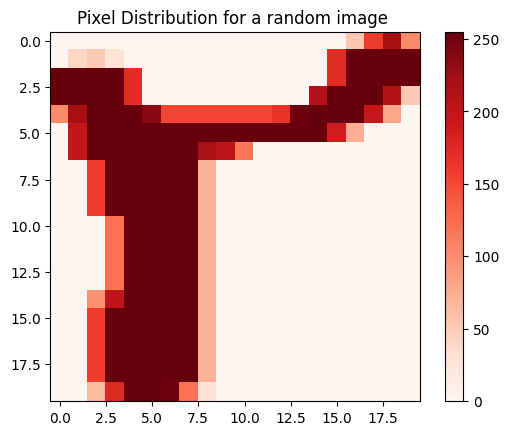

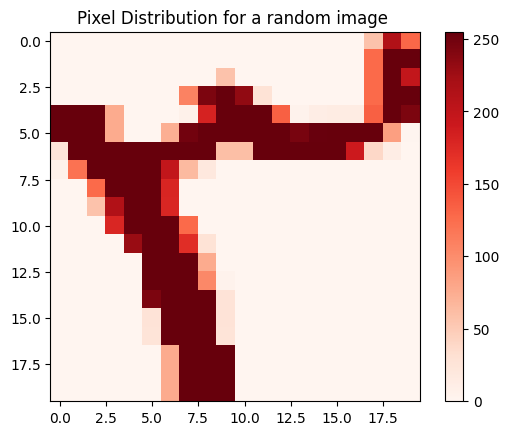

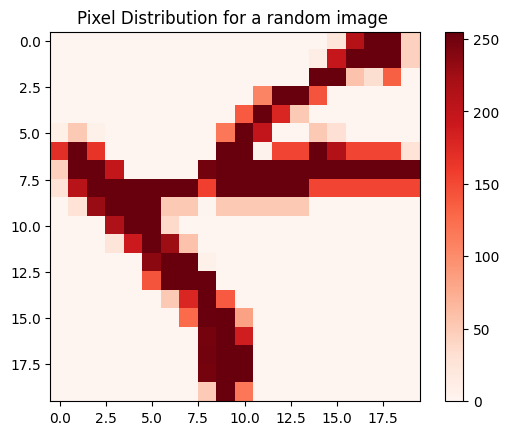

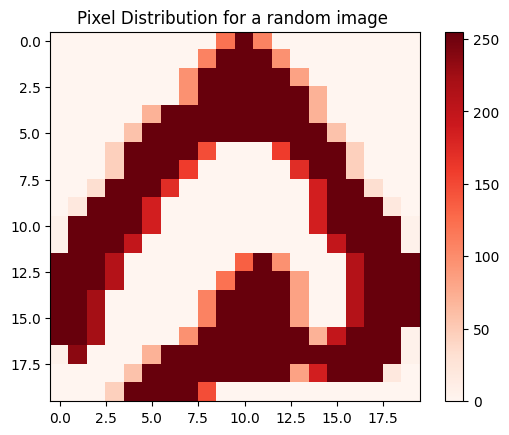

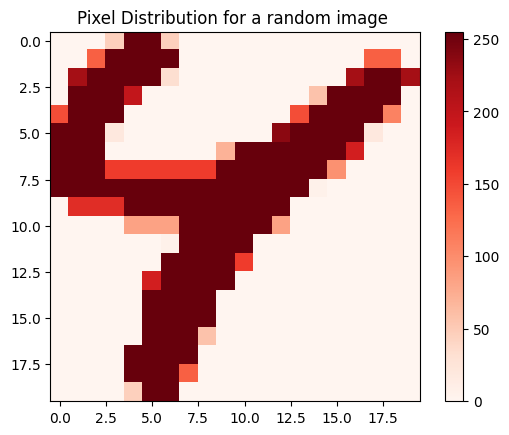

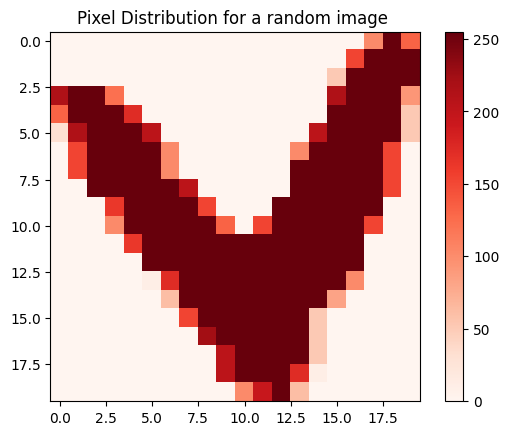

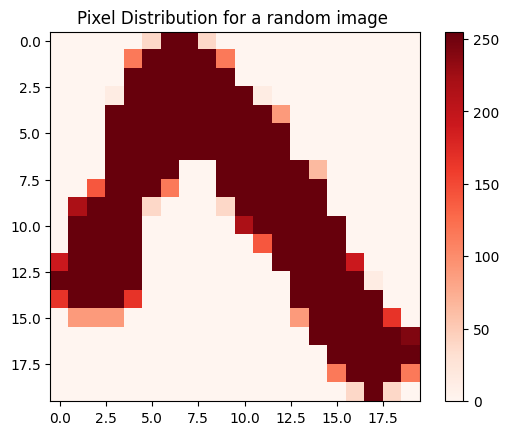

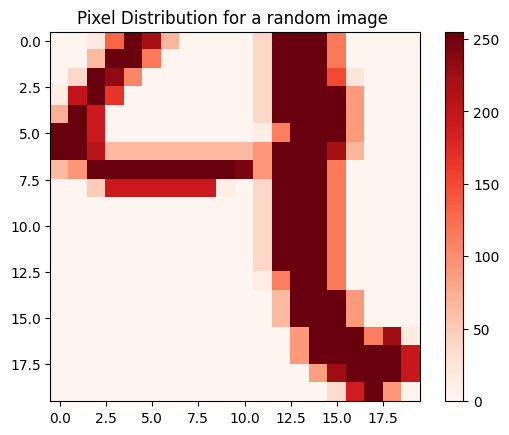

In [360]:
showAllNumberSample(train)

<h3 style="color:#FC4F00;">Question 5 :</h3>


In [361]:
def countNumberSample (data , label):
    dist = []
    for j in range(0 , 10 ):
        count = 0 
        for i in range(len(data)):
            if label[i] == j:
                count += 1
        dist.append(count)
    return dist

In [362]:
trainDistribution = countNumberSample(train , trainLabel)
print(trainDistribution)

[475, 482, 487, 475, 488, 500, 454, 493, 475, 471]


In [363]:
def plotNumberDistribution (dist):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    nums = ['0s' , '1s' , '2s' , '3s' , '4s' , '5s' , '6s' , '7s' , '8s' , '9s']
    students = dist
    ax.bar(nums,dist , color = ['#004726' , '#006b39' , '#008e4c' , '#00b260' , '#00d673' , '#00f986' , '#1eff97' , '#42ffa6' , '#66ffb8' ,'#89ffc8'])
    plt.show()

<h4 style="color:#F79540;">The train numbers distributions is like this becuase its uniform distribution</h4>

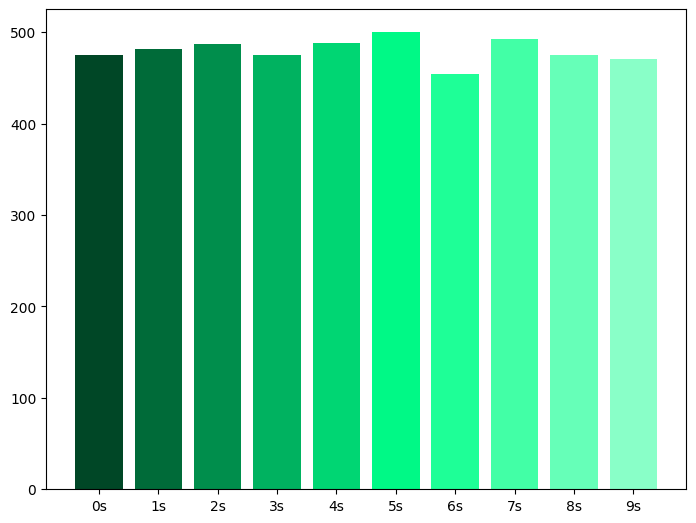

In [364]:
plotNumberDistribution(trainDistribution)

<h4 style="color:#F79540;">The TEST numbers distributions is like this becuase its uniform distribution</h4>

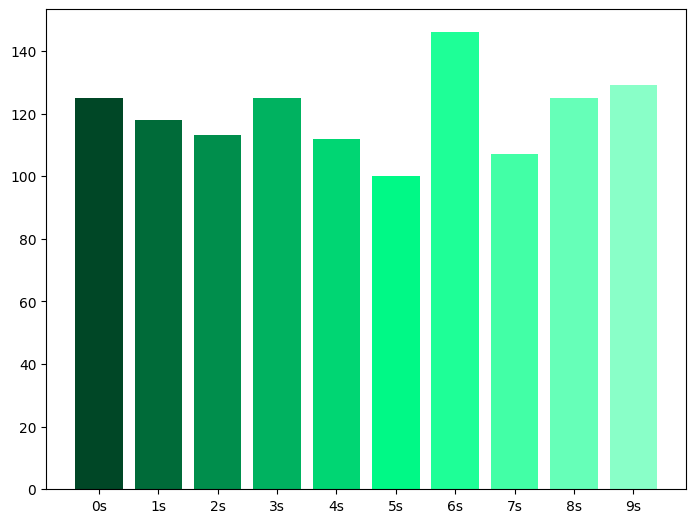

In [365]:
plotNumberDistribution(countNumberSample(test , testLabel))

<h3 style="color:#FC4F00;">Question 6 :</h3>

<h4 style="color:#991510;">CONVERGNESS

<h4 style="color:#F79540;">Scaling pixel colors can be important for training a machine learning model because it can help to normalize the input data and make it easier for the model to learn patterns in the data.

<h4 style="color:#F79540;">When we scale the pixel values, we transform the data so that all the features have similar ranges of values. This can help the model to converge faster during training, and can also prevent some features from dominating others.

In [366]:
train[0]

def scale (pix):
    return pix/255

scaleAll = np.vectorize(scale)
scaleAll(train[0])

array([[0.        , 0.        , 0.        , 0.17647059, 1.        ,
        1.        , 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5254902 , 1.        , 1.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5254902 , 0.5254902 , 0.        ],
       [0.        , 0.8745098 , 1.        , 1.        , 1.        ,
        1.        , 0.1254902 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8745098 , 1.        , 1.        , 0.8745098 ],
       [0.        , 1.        , 1.        , 1.        , 0.77647059,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [367]:
for i in range(len(train)) :
    train[i] = scaleAll(train[i])

In [368]:
testLabel[0]

7

In [369]:
test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 121, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 242, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  17, 244, 255, 255, 233],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  63, 228, 255, 255, 157,  11],
       [ 11, 157, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4, 139, 255, 255, 236,  80,   0],
       [233, 255, 255, 218,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         13, 255, 255, 255, 191,   0,   0],
       [  0,  57, 128, 255, 255,  89,   0,   0,   0,   0,   0,   0,   0,
         13, 255, 255, 255,  96,   0,   0],
       [  0,   0,   0,  13, 255, 255,  37,   0,   0,   0,   0,  

In [370]:
for i in range(len(test)) :
    test[i] = scaleAll(test[i])

In [371]:
(test[0])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4745098 , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.94901961, 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

<h4 style="color:#F79540;">Scaling the pixel values is useful in Naive Bayes classification because it can help to improve the accuracy of the model. </h4>

<h4 style="color:#F79540;">Naive Bayes classification assumes that the features (in this case, the pixel values) are independent and normally distributed. When the pixel values are not scaled, the range of values may vary widely between pixels, and this can cause the model to assign too much weight to certain features and not enough weight to others.</h4>

<h4 style="color:#F79540;">Scaling the pixel values ensures that they have a similar range, which can help the model to treat each feature equally and avoid overemphasizing certain pixels. This can lead to a more accurate model.</h4

<h2 style="color:#B71375;">Part 2 :</h2>

<h1 style="color:#B71375;">Gaussian Naive Bayes

<h3 style="color:#FC4F00;">Question 7 :</h3>

<h4 style="color:#FC4F00;"> نیازی به محاسبه مخرج نیست چون توی نحیف بیز فرض میکنیم فیچر ها (پیکسل ها) از هم مستقل اند

<h4 style="color:#F79540;">evidence : all probablity

<h4 style="color:#F79540;">likelihood : probablity of the test digit be in C class

<h4 style="color:#F79540;">prior : probablity of being c class between all classes

<h4 style="color:#F79540;"> posterior : probablity of the being C class aware about the digit 

In [372]:
trainClassed = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}

In [373]:
for i in range (len(train)):
    trainClassed[trainLabel[i]].append(train[i])


In [374]:
def plotTheDataPlasma (chosen):
    pixelPlot = plt.figure()

    plt.title("Pixel Distribution for image ")
    pixelPlot = plt.imshow(chosen, cmap="plasma", interpolation='nearest')


    plt.colorbar(pixelPlot)

In [375]:
means = {}
variances = {}
for i in trainClassed:
    means[i] = np.mean(trainClassed[i] , axis=0)
    variances[i] = np.var(trainClassed[i] , axis=0)

<h1 style="color:#B71375;">PLOT MEANS

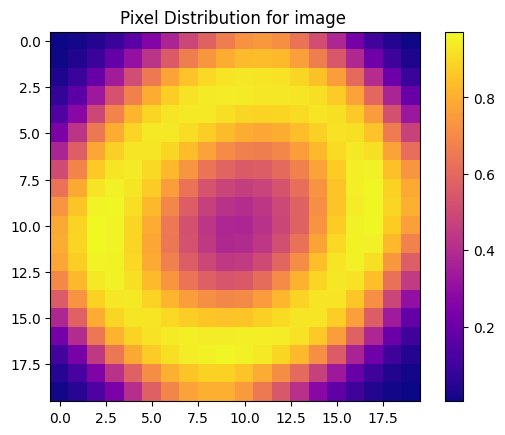

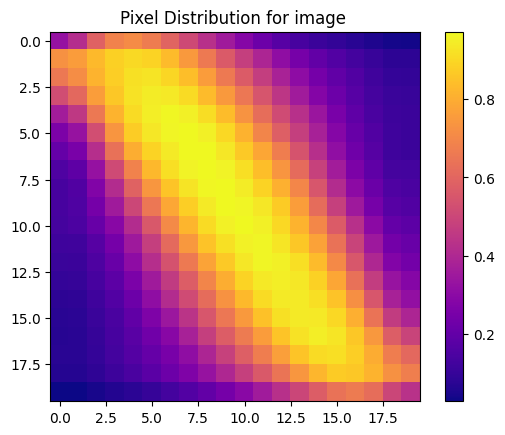

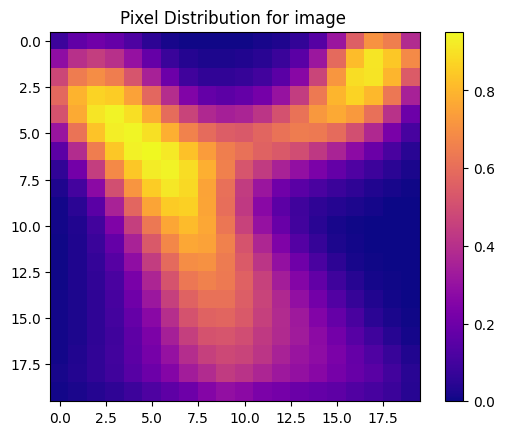

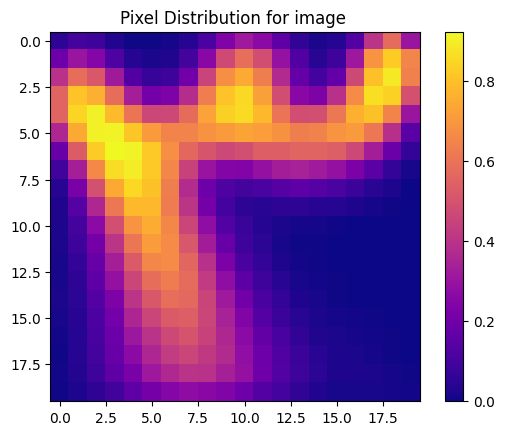

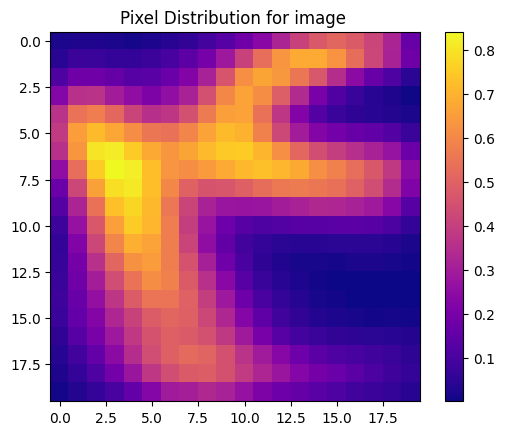

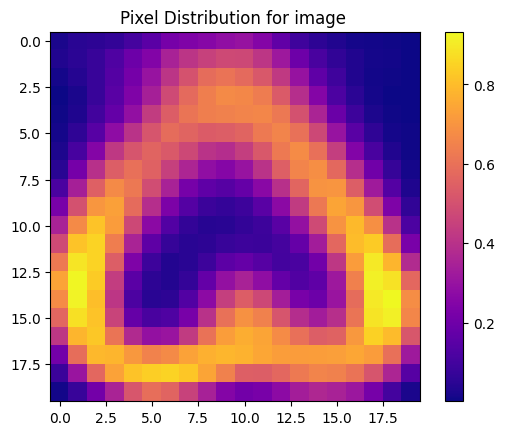

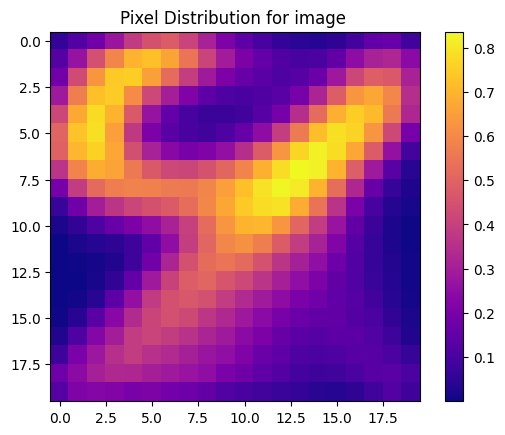

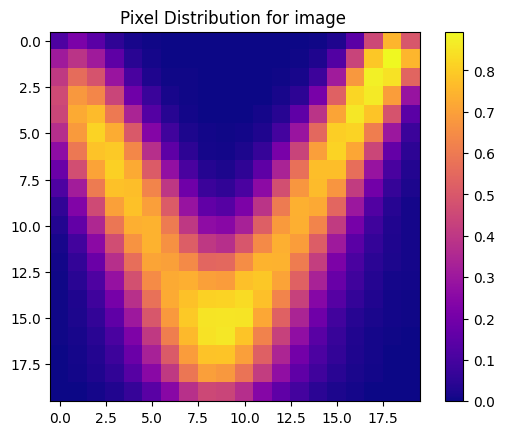

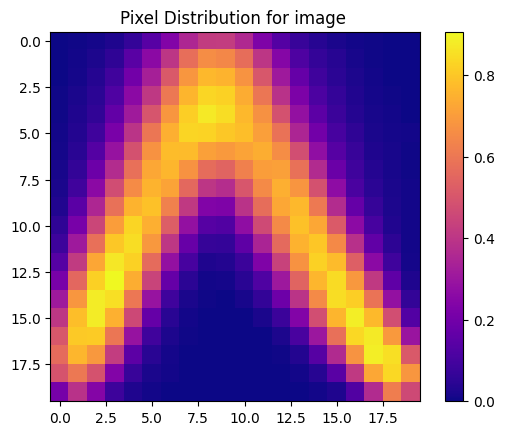

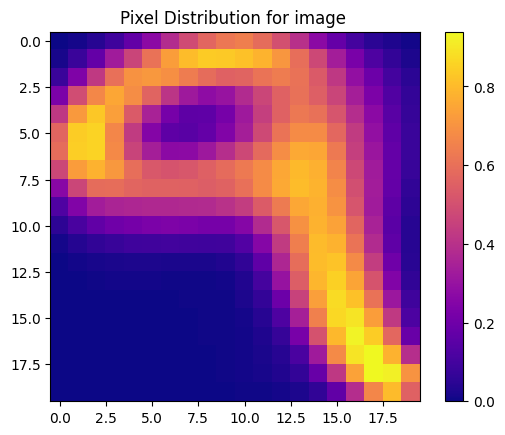

In [376]:
for i in range(len(means)):
    plotTheDataPlasma(means[i])


<h1 style="color:#B71375;">PLOT VARIANCES

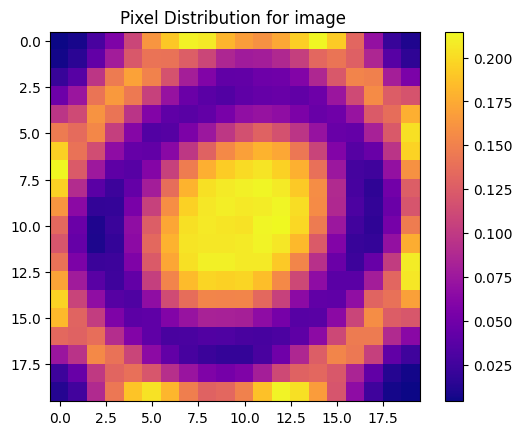

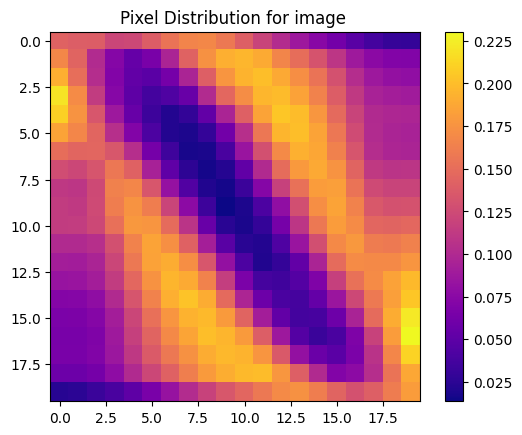

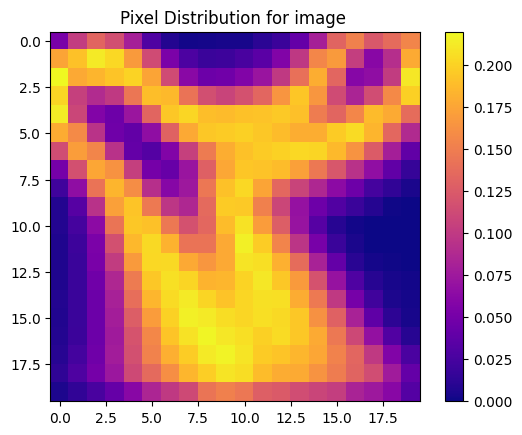

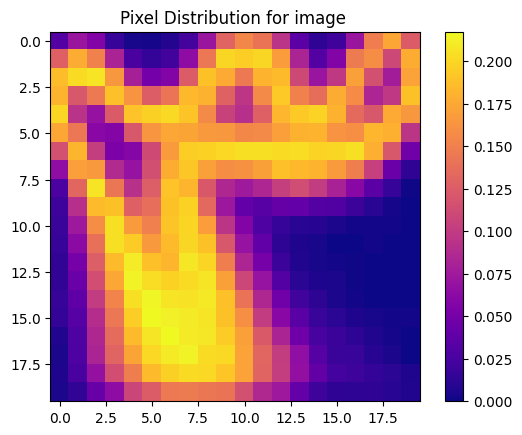

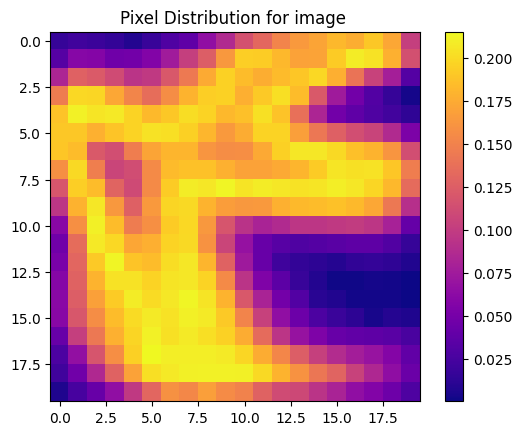

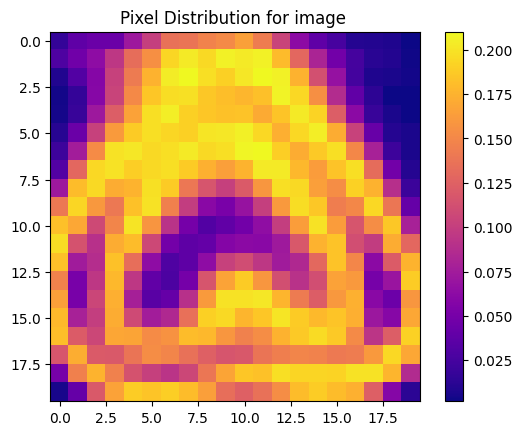

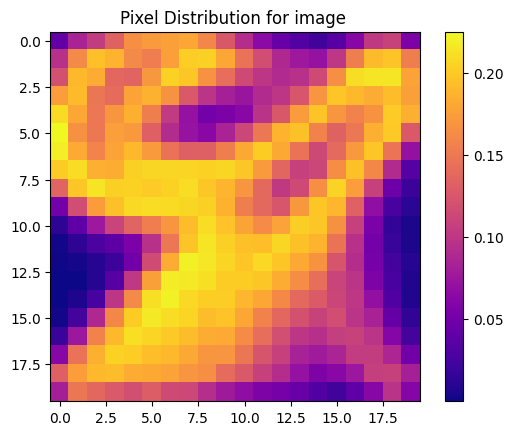

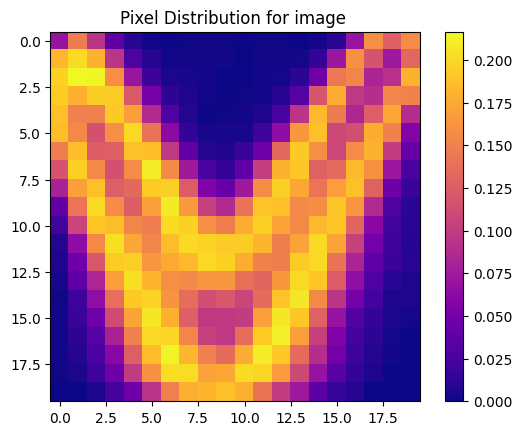

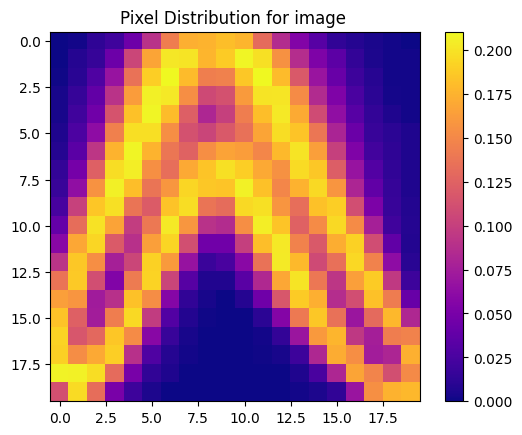

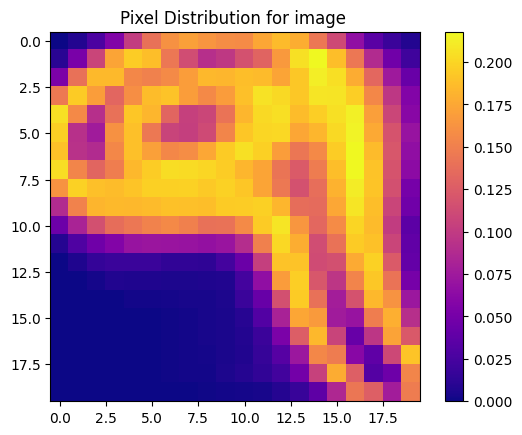

In [377]:
for i in range(len(variances)):
    plotTheDataPlasma(variances[i])


In [378]:
prior = {}
for i in range(len(trainClassed)):
    prior[i] = len(trainClassed[i]) / len(train)

In [379]:
prior

{0: 0.09895833333333333,
 1: 0.10041666666666667,
 2: 0.10145833333333333,
 3: 0.09895833333333333,
 4: 0.10166666666666667,
 5: 0.10416666666666667,
 6: 0.09458333333333334,
 7: 0.10270833333333333,
 8: 0.09895833333333333,
 9: 0.098125}

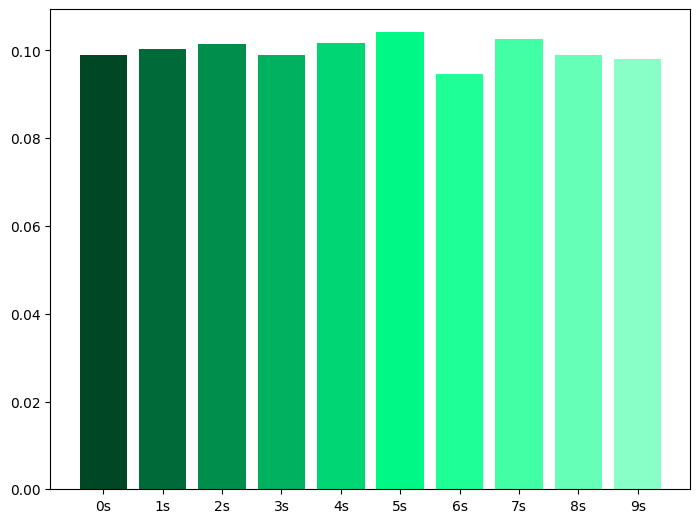

In [380]:
plotNumberDistribution(prior.values())

In [381]:
testPred_GNB_not_AS = []

for x in test:
    likelihoods_GNB_not_AS = {}
    for digit in trainClassed:
        mean = means[digit]
        variance = variances[digit] 
        likelihood = np.prod(np.exp(-(x - mean) ** 2 / (2 * variance)) / np.sqrt(2 * np.pi * variance))
        likelihoods_GNB_not_AS[digit] = likelihood * prior[digit]

    testPred_GNB_not_AS.append(max(likelihoods_GNB_not_AS, key=likelihoods_GNB_not_AS.get))


/var/folders/yq/_16ynlq54j7bq1pp010kq9w80000gn/T/ipykernel_90796/4043326452.py:8: RuntimeWarning: invalid value encountered in divide
  likelihood = np.prod(np.exp(-(x - mean) ** 2 / (2 * variance)) / np.sqrt(2 * np.pi * variance))
/var/folders/yq/_16ynlq54j7bq1pp010kq9w80000gn/T/ipykernel_90796/4043326452.py:8: RuntimeWarning: divide by zero encountered in divide
  likelihood = np.prod(np.exp(-(x - mean) ** 2 / (2 * variance)) / np.sqrt(2 * np.pi * variance))


In [382]:
testPred_GNB_not_AS[:10]

[6, 4, 1, 5, 4, 5, 4, 6, 0, 0]

In [383]:
testLabel[:10]

[7, 2, 1, 5, 4, 5, 2, 2, 0, 0]

<h4 style="color:#F79540;">This can happen if the variance of a pixel value in a class is zero, which leads to division by zero when computing the Gaussian distribution.

<h4 style="color:#F79540;">To fix this issue, you can add a small constant to the variance before computing the likelihood. This is a common technique called "smoothing" or "regularization", which helps avoid numerical instability when the variance is very small.

<h4 style="color:#F79540;">Here's an updated code snippet that adds a small constant (e.g., 1e-9) to the variance:

In [384]:
testPred_GNB = []

for x in test:
    likelihoods_GNB = {}
    for digit in trainClassed:
        mean = means[digit]
        variance = variances[digit] + 1e-9
        likelihood = np.prod(np.exp(-(x - mean) ** 2 / (2 * variance)) / np.sqrt(2 * np.pi * variance))
        likelihoods_GNB[digit] = likelihood * prior[digit]

    testPred_GNB.append(max(likelihoods_GNB, key=likelihoods_GNB.get))


In [385]:
testPred_GNB[:10]

[7, 3, 1, 5, 3, 5, 3, 2, 0, 0]

In [386]:
testLabel[:10]

[7, 2, 1, 5, 4, 5, 2, 2, 0, 0]

<h2 style="color:#B71375;">Bernoulli Navie Bayes :</h2>

In [387]:
train , trainLabel , test , testLabel , data , label = load()
resize()


Number of all data : 6000
test PER train ratio :  0.2
Number of test Data :  1200
number Of train Data :  4800


In [388]:
train[0].shape

(20, 20)

In [389]:
def scaleToBinary (pix):
    threshold = 255/2
    if pix > threshold:
        return 1
    else :
        return 0
    

scaleAllToBinary = np.vectorize(scaleToBinary)
scaleAllToBinary(train[0])

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1,

In [390]:
for i in range(len(train)) :
    train[i] = scaleAllToBinary(train[i])

In [391]:
for i in range(len(test)) :
    test[i] = scaleAllToBinary(test[i])

In [392]:
prob1 = {}
prob0 = {}
for digit in trainClassed:
    prob1[digit] = (np.array(trainClassed[digit]).sum(axis=0))/(len(trainClassed[digit]))
    prob0[digit] = 1 - prob1[digit]

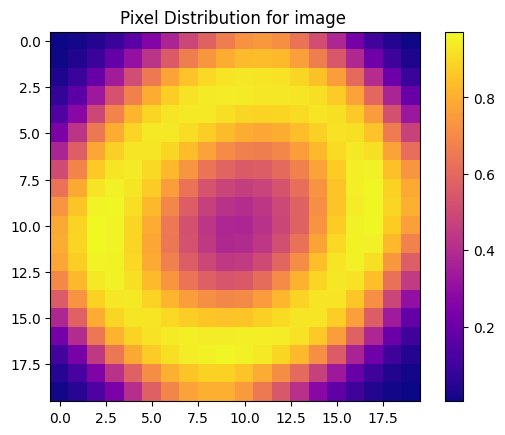

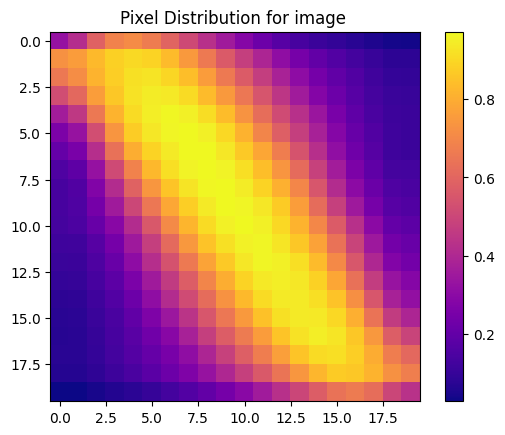

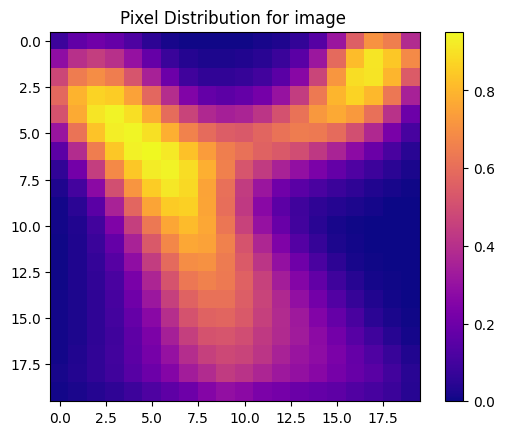

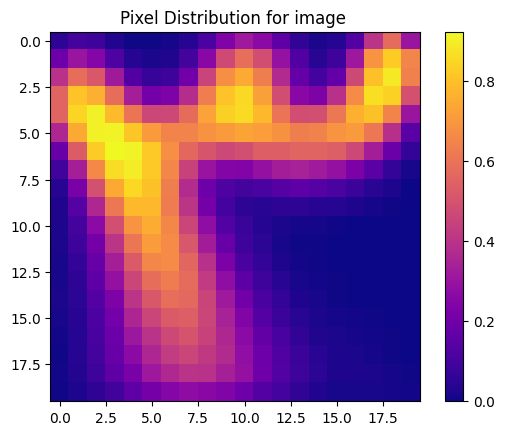

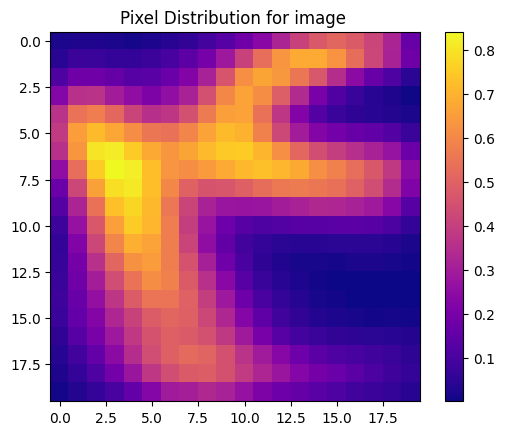

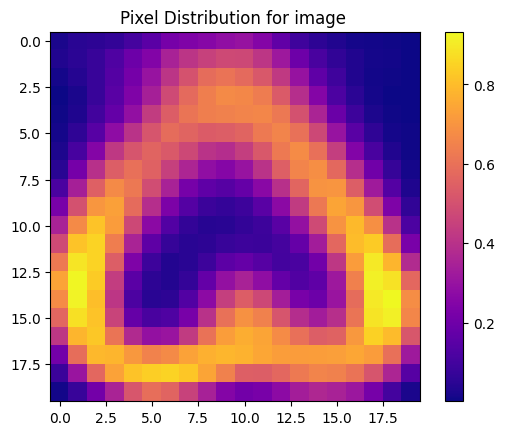

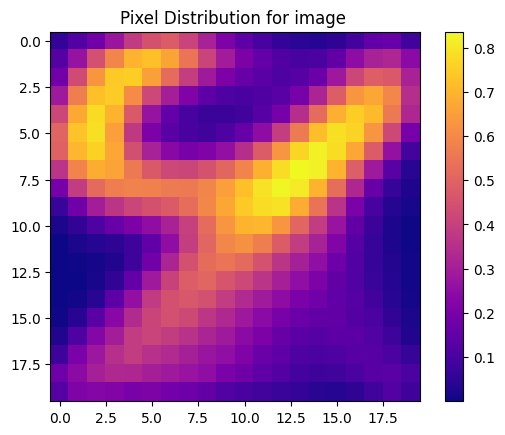

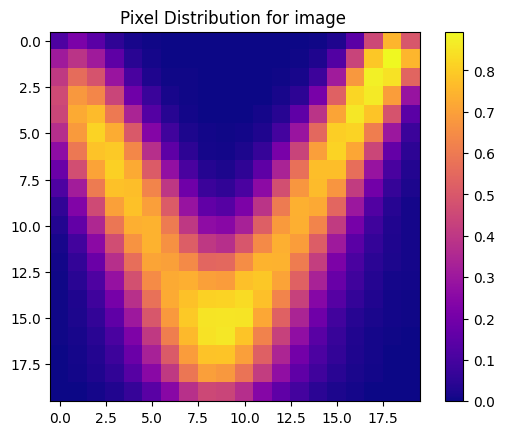

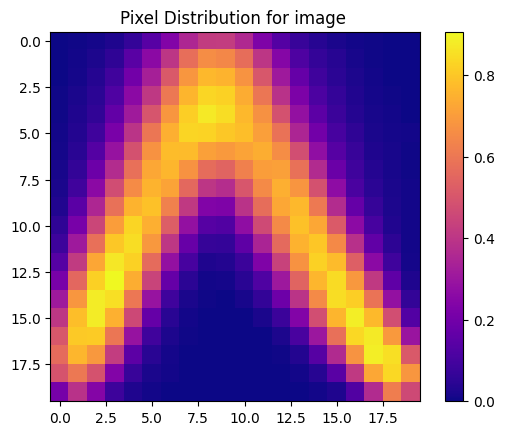

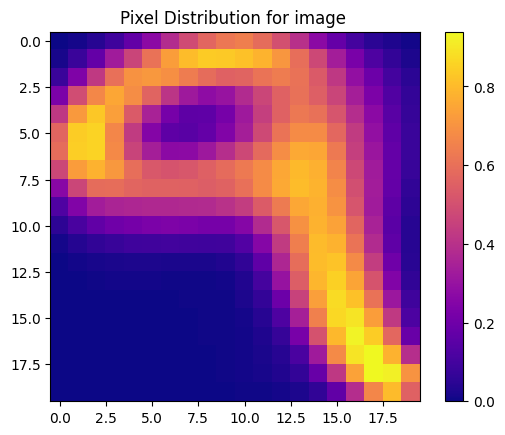

In [393]:
for i in range(len(prob1)):
    plotTheDataPlasma(prob1[i])

In [394]:
testPred_BNB_not_AS = []

for x in test:
    likelihoods_BNB_not_AS = {}
    for digit in trainClassed:
        prob1_digit = prob1[digit]
        prob0_digit = prob0[digit]
        

        likelihood = np.prod(np.where(x == 1, prob1_digit, prob0_digit))
        likelihoods_BNB_not_AS[digit] = likelihood * prior[digit]
    
    testPred_BNB_not_AS.append(max(likelihoods_BNB_not_AS, key=likelihoods_BNB_not_AS.get))


In [395]:
smoothFactor = 1
prob1 = {}
prob0 = {}
for digit in trainClassed:

    prob1[digit] = ((np.array(trainClassed[digit])).sum(axis=0) + smoothFactor)/(len(trainClassed[digit]) + 2*smoothFactor)
    prob0[digit] = 1 - prob1[digit]

<h4 style="color:#F79540;">The factor of 2 in the denominator is because there are two possible values (0 or 1) for each feature (pixel). You can adjust the value of SMOOTHFACTOR to control the amount of smoothing. A larger value of alpha will result in more smoothing, which can help prevent overfitting but may also reduce the model's ability to capture complex patterns in the data.

In [396]:
testPred_BNB = []

for x in test:
    likelihoods_BNB = {}
    for digit in trainClassed:
        prob1_digit = prob1[digit]
        prob0_digit = prob0[digit]
        

        likelihood = np.prod(np.where(x == 1, prob1_digit, prob0_digit))
        likelihoods_BNB[digit] = likelihood * prior[digit]
    
    testPred_BNB.append(max(likelihoods_BNB, key=likelihoods_BNB.get))


In [397]:
testPred_BNB[:20]

[7, 3, 1, 5, 4, 5, 3, 2, 0, 0, 8, 0, 2, 8, 0, 2, 3, 3, 1, 5]

In [398]:
testPred_GNB[:20]

[7, 3, 1, 5, 3, 5, 3, 2, 0, 0, 8, 0, 2, 8, 0, 2, 3, 3, 1, 5]

In [399]:
testLabel[:20]

[7, 2, 1, 5, 4, 5, 2, 2, 0, 0, 8, 0, 1, 8, 0, 2, 3, 3, 1, 5]

<h2 style="color:#B71375;">Part 3 :</h2>

In [422]:
def accuracy (test , pred):
    correct = 0 
    for i in range(len(test)):
        if test[i] == pred[i]:
            correct += 1 
    return correct/len(test)

In [401]:
accuracy(testLabel,testPred_GNB_not_AS)

0.4683333333333333

In [402]:
accuracy(testLabel,testPred_GNB)

0.8575

In [403]:
accuracy(testLabel,testPred_BNB)

0.8791666666666667

In [404]:
accuracy(testLabel,testPred_BNB_not_AS)

0.8791666666666667

In [405]:
def precision (test , pred):
    correctCounter = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    allDetection = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    for i in range(len(test)):
        if test[i] == pred[i]:
            correctCounter[test[i]] += 1 
            allDetection[test[i]] += 1
        else :
            allDetection[pred[i]] += 1
    
    thePre = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    for i in correctCounter.keys():
        try:
            thePre[i] = correctCounter[i] / allDetection[i]
        except:
            thePre[i] = '-'
    return thePre

In [406]:
def recall (test , pred):
    correctCounter = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    leng = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    
    for i in range(len(test)):
        if test[i] == pred[i]:
            correctCounter[test[i]] += 1 
        leng[test[i]] += 1
    

    rec ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    for i in leng.keys():
        rec[i] = correctCounter[i] / leng[i]
        
    return rec

In [407]:
recall(testLabel , testPred_BNB)

{0: 0.952,
 1: 0.8559322033898306,
 2: 0.7610619469026548,
 3: 0.768,
 4: 0.8660714285714286,
 5: 0.97,
 6: 0.7465753424657534,
 7: 0.9626168224299065,
 8: 0.96,
 9: 0.9844961240310077}

In [408]:
def F1(rec , pre):
    theF1 = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    
    for i in rec.keys():
        try:
            theF1[i] = 2 * rec[i] * pre[i] /(pre[i]+rec[i])
        except :
            theF1[i] = '-'
    return theF1

In [409]:
f1 = F1(recall(testLabel , testPred_BNB) , precision(testLabel,testPred_BNB))

<h3 style="color:#FC4F00;">Question 10 :</h3>

<h3 style="color:#FC4F00;">PRESICION  : of the samples we predicted to be True how many of those were actually True.

<h4 style="color:#F79540;">Sure, let's say we are building a model to detect spam emails. We have a dataset of 1000 emails, where only 50 of them are spam. We train our model using this dataset and test it on a validation dataset.
<br><br>
After training and validation, we get the following results:
<br><br>
   Precision: 95%
    <br>
   Recall: 30%
    <br>
   F1-score: 45%<br><br>
This means that out of all the emails predicted as spam by the model, 95% of them are actually spam. However, the model is not very good as it has a very low recall rate. It only correctly identified 30% of all the spam emails in the dataset.
    <br><br>
    
    
نود درصد اعدادی که در کلاس یک هستند درست اند ولی ما شاید فقط بیست درصد یکها را در دیتاست تشخیض داده ایم

<h4 style="color:#F79540;">One reason why precision alone may not be enough is that it does not take into account the false negatives, which are samples that were incorrectly classified as negative. This means that a model with high precision may still be missing a significant number of positive samples, leading to poor recall and overall accuracy.

<h4 style="color:#F79540;">Another reason is that the dataset used to train the model may not be representative of the real-world data that the model will encounter in deployment. In such cases, a model may have high precision on the training set, but may not perform well on unseen data, leading to poor generalization performance.

<h3 style="color:#FC4F00;">RECALL : out of all the True samples how many did we classify correctly as True.

<h4 style="color:#F79540;"> 
    ممکن است از همه کلاس های درست را درست بیشبینی کنیم ولی باز هم علاوه بر آنها پیشبینی بریزیم در آن کلاس

<h4 style="color:#F79540;">For example, suppose we have a binary classification problem where the positive class is rare and the negative class is common.<br><br> A model that simply predicts negative for every instance would have a high recall for the negative class but would not be useful for the positive class

<h3 style="color:#FC4F00;">Question 11: Harmonic Mean

<h4 style="color:#F79540;"> The F1 score is defined as the harmonic mean of precision and recall.



<h4 style="color:#F79540;"> Harmonic mean is the reciprocal of the arithmetic mean of the reciprocals of a set of numbers. It is used in situations where the rate of change is important. It is commonly used to find the average of rates, such as speed or flow rate.

<h4 style="color:#F79540;">in the way that it gives more weight to smaller values in a set of numbers.

<h4 style="color:#F79540;">In F1 score, harmonic mean is used because it gives more weight to the smaller value of precision or recall, which is important in situations where false positives or false negatives are costly. The harmonic mean ensures that the F1 score is not biased towards larger values of precision or recall.

<h4 style="color:#F79540;"> For example, when Precision is 100% and Recall is 0%, the F1-score will be 0%, not 50%.

<h3 style="color:#FC4F00;">Question 12:

combining the per-class F1-scores into a single number, the classifier’s overall F1-score.

arithmetic mean of the per-class F1-scores. This is called the macro-averaged F1-score

In [410]:
def macro (f):
    s = 0 
    for i in f.values():
        try :
            s += i
        except :
            s += 0 
    return s/len(f.keys())

When averaging the macro-F1, we gave equal weights to each class. We don’t have to do that: in weighted-average F1-score, or weighted-F1, we weight the F1-score of each class by the number of samples from that class

In [411]:
def wighted (f , test):
    s = 0 
    testC = {0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0 , 7:0 , 8:0 , 9:0}
    for i in test : 
        testC[i] += 1
    
    
    for i in f.keys():
        try :
            s += f[i] * testC[i]
        except :
            s += 0
    return s / len(test)    

In [412]:
wighted(f1 , testLabel)

0.8794046772883388

<h1 style="color:#B71375;">Analysis for GNB without additive smoothing

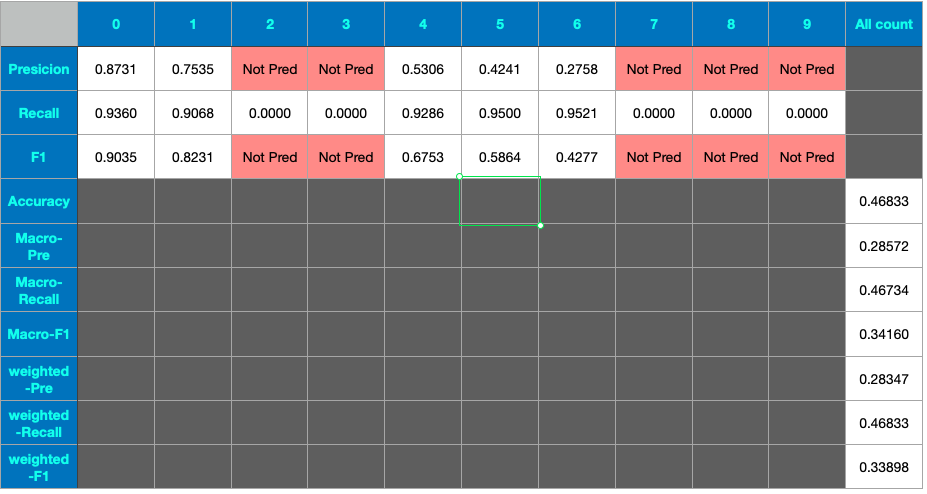

<h1 style="color:#B71375;">Analysis for GNB by additive smooth

In [413]:
p = precision(testLabel , testPred_GNB)
r = recall(testLabel , testPred_GNB)
f = F1(r , p)
a = accuracy(testLabel , testPred_GNB)
mp = macro(p)
mr = macro(r)
mf = macro(f)
wp = wighted(p , testLabel)
wr = wighted(r , testLabel)
wf = wighted(f , testLabel)

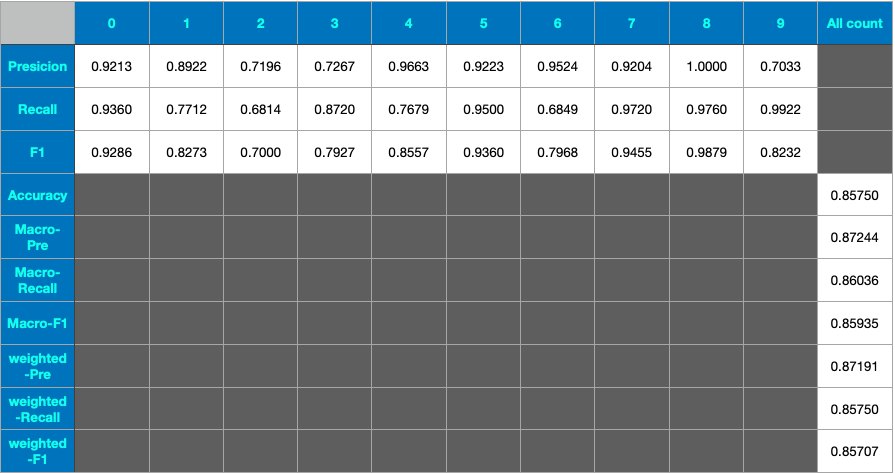

<h1 style="color:#B71375;">Analysis for BNB with and without AS

<h3 style="color:#FC4F00;"> becuase that there was not any 0 value of for each p the bernoulli is same

In [414]:
p = precision(testLabel , testPred_BNB)
r = recall(testLabel , testPred_BNB)
f = F1(r , p)
a = accuracy(testLabel , testPred_BNB)
mp = macro(p)
mr = macro(r)
mf = macro(f)
wp = wighted(p , testLabel)
wr = wighted(r , testLabel)
wf = wighted(f , testLabel)

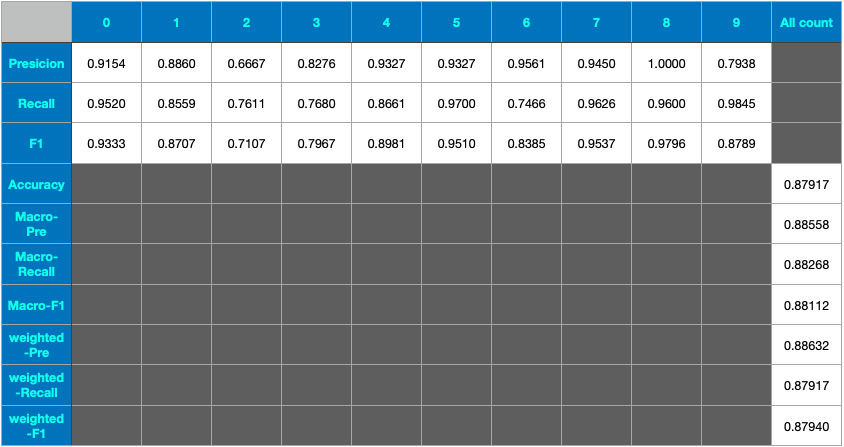

In [415]:
def plot_line_chart(chart , data_dict1, data_dict2, data_dict3,data_dict4):
    x = list(data_dict1.keys())
    y1 = list(data_dict1.values())
    y2 = list(data_dict2.values())
    y3 = list(data_dict3.values())
    y4 = list(data_dict4.values())
    
    plt.plot(x, y1, label='GNB_not_AS')
    plt.plot(x, y2, label='GNB')
    plt.plot(x, y3, label='BNB_not_AS')
    plt.plot(x, y4, label='BNB')
    
    
    plt.xlabel('DIGITS')
    plt.ylabel(chart)
    plt.title('Comparison ' + chart)
    plt.gca().invert_yaxis()
    plt.xticks(range(0, 10))

    plt.legend()
    plt.show()

<h1 style="color:#B71375;"> Compare presicion values 

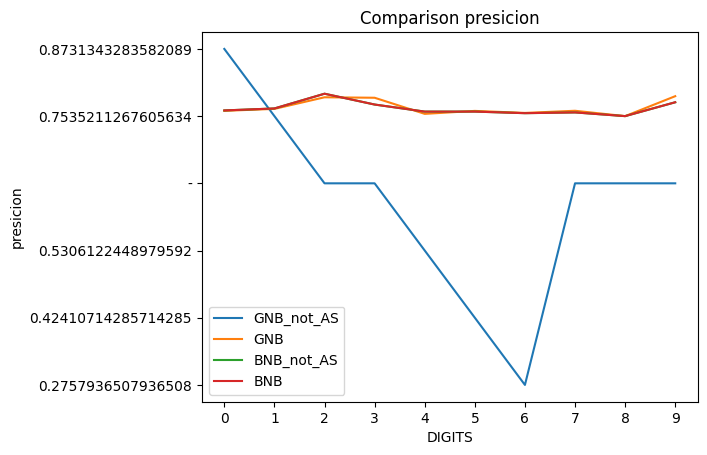

In [416]:
p1 = precision(testLabel , testPred_GNB_not_AS)
p2 = precision(testLabel , testPred_GNB)
p3 = precision(testLabel , testPred_BNB_not_AS)
p4 = precision(testLabel , testPred_BNB)
plot_line_chart('presicion' , p1 , p2 , p3 , p4)

<h1 style="color:#B71375;"> Compare recall values 

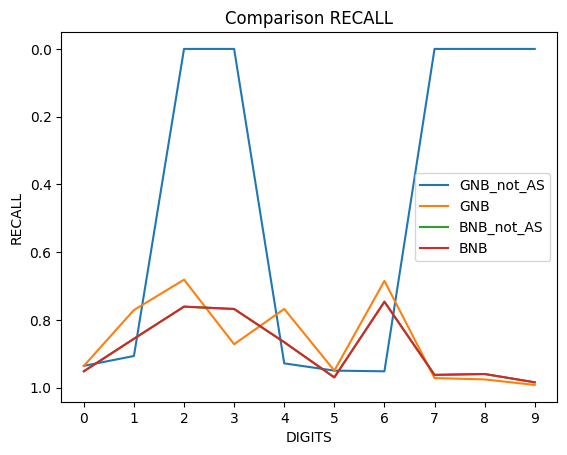

In [417]:
r1 = recall(testLabel , testPred_GNB_not_AS)
r2 = recall(testLabel , testPred_GNB)
r3 = recall(testLabel , testPred_BNB_not_AS)
r4 = recall(testLabel , testPred_BNB)
plot_line_chart('RECALL' , r1 , r2 , r3 , r4)

<h1 style="color:#B71375;"> Compare F1 values 

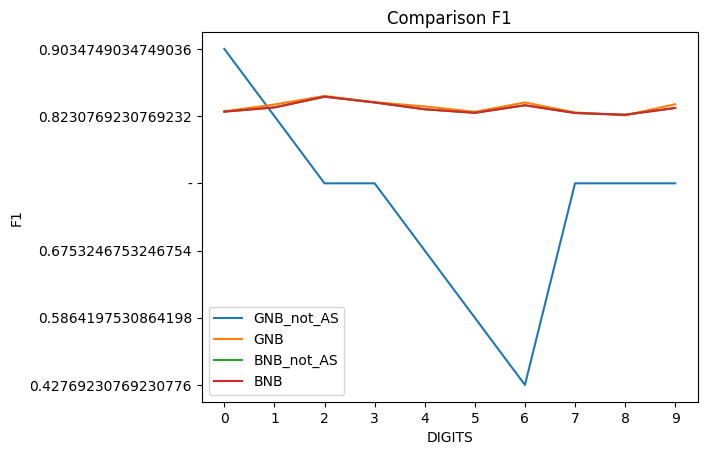

In [418]:
f11 = F1(r1 , p1)
f22 = F1(r2 , p2)
f33 = F1(r3 , p3)
f44 = F1(r4 , p4)
plot_line_chart('F1' , f11 , f22 , f33 , f44)

In [419]:
def compare (chart , a , b , c , d ):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    nums = ['GNB_NOT_AS' , 'GNB' , "BNB_NOT_AS" , 'BNB']
    s = [a , b , c ,d]
    ax.bar(nums, s, color = ['#4A235A','#7D3C98' , '#A569BD' , '#D2B4DE'])
    plt.title(chart)
    plt.show()


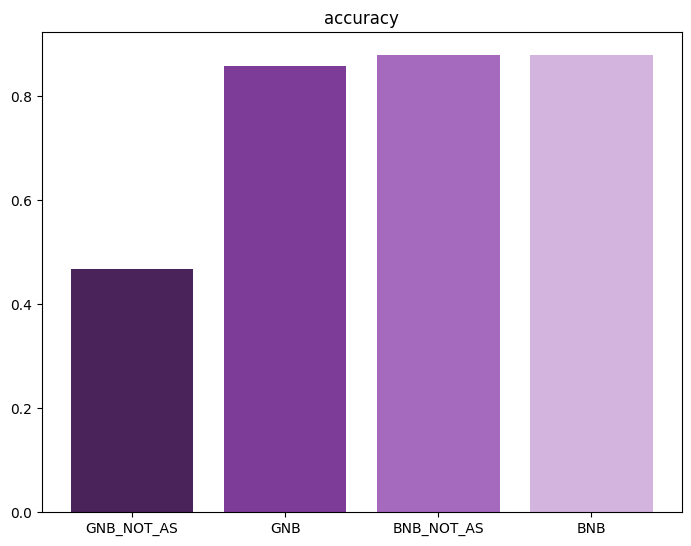

In [420]:
compare('accuracy' , accuracy(testLabel , testPred_GNB_not_AS) , accuracy(testLabel , testPred_GNB) ,  accuracy(testLabel , testPred_BNB_not_AS) ,  accuracy(testLabel , testPred_BNB))

<h1 style="color:#B71375;"> Show some wrong prediction sample of my model

In [423]:
predFalse = []
for i in range(len(testLabel)):
    if testLabel[i] != testPred_BNB[i] :
        predFalse.append((testLabel[i] ,testPred_BNB[i], i))

In [443]:
def showWrong(pred):
    print('Real Label was' , pred[0])
    print('My model predicte it as ' , pred[1])
    plotTheDataPlasma(test[pred[2]])

Real Label was 2
My model predicte it as  3


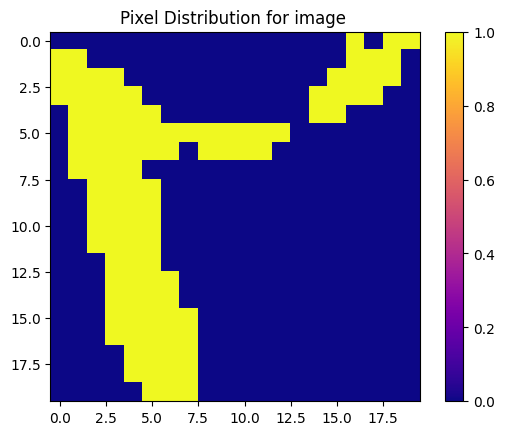

In [444]:
showWrong(predFalse[0])

Real Label was 6
My model predicte it as  2


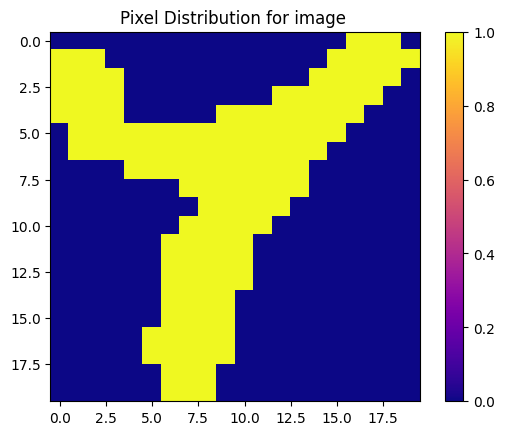

In [445]:
showWrong(predFalse[randint(1 , len(predFalse))])

Real Label was 8
My model predicte it as  6


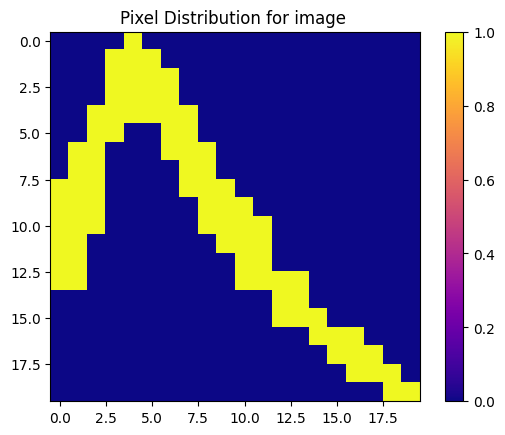

In [446]:
showWrong(predFalse[randint(1 , len(predFalse))])

Real Label was 6
My model predicte it as  9


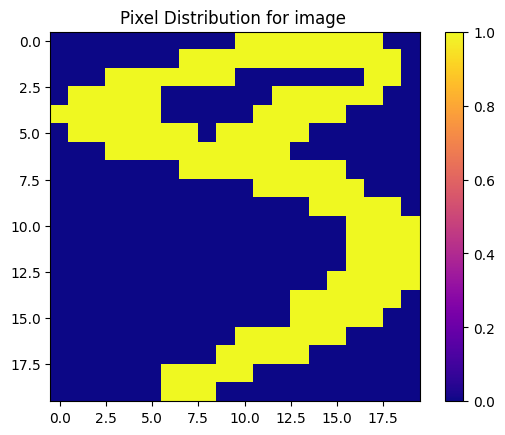

In [447]:
showWrong(predFalse[randint(1 , len(predFalse))])

Real Label was 2
My model predicte it as  1


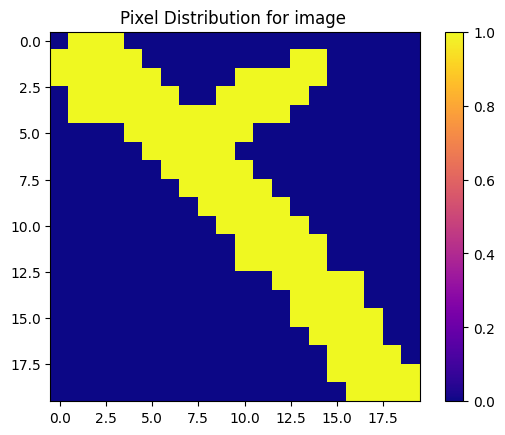

In [448]:
showWrong(predFalse[randint(1 , len(predFalse))])

Real Label was 2
My model predicte it as  4


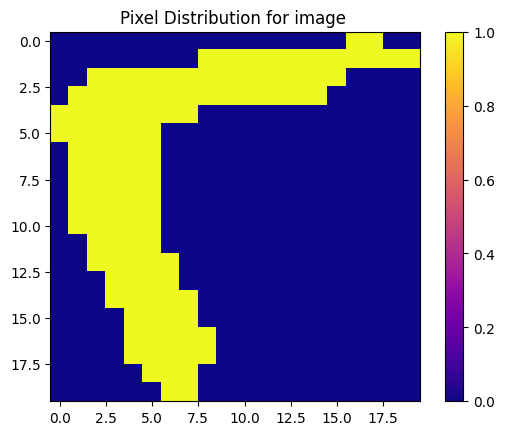

In [449]:
showWrong(predFalse[randint(1 , len(predFalse))])

<h3 style="color:#FC4F00;"> Refrences:

<h4 style="color:#F79540;"> RUSSEL BOOK
 

<h4 style="color:#F79540;"> https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

<h4 style="color:#F79540;"> https://numpy.org/doc/stable/reference/generated/numpy.prod.html

<h4 style="color:#F79540;"> https://matplotlib.org/stable/gallery/color/